# Do countries with higher life expectancy tend to produce professional soccer players (FIFA 21) with better Overall statistics?

**Author**: Tassilo Westphalen  
**Date**: November 2024

## 1. Library import


In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as smf

## 2. Data import


In [45]:
pd.set_option("display.max_column", None)
data_fifa = pd.read_csv("fifa_21.csv")
data_countries = pd.read_csv("life-expectancy.csv")
display(data_fifa)
display(data_countries)

/var/folders/r4/szwn752d0wz7v8zsggzh89_40000gn/T/ipykernel_4953/309302043.py:2: DtypeWarning: Columns (69) have mixed types. Specify dtype option on import or set low_memory=False.
  data_fifa = pd.read_csv("fifa_21.csv")


,Name,Nationality,Age,Overall,Potential,Club,Contract,Positions,Height,Weight,Preferred Foot,Best Overall,Best Position,Value,Wage,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,Reputation,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,Lionel Messi,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,CF RW ST,170,72,Left,93,RW,103500000.0,€560K,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,771
1,C. Ronaldo dos Santos Aveiro,Portugal,35,92,92,Juventus,2018 ~ 2022,LW ST,187,83,Right,92,ST,63000000.0,€220K,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,562
2,Jan Oblak,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,GK,188,87,Right,91,GK,120000000.0,€125K,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90,150
3,Kevin De Bruyne,Belgium,29,91,91,Manchester City,2015 ~ 2023,CAM CM,181,70,Right,91,CAM,129000000.0,€370K,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,207
4,Neymar da Silva Santos Jr.,Brazil,28,91,91,Paris Saint-Germain,2017 ~ 2022,CAM LW,175,68,Right,91,LW,132000000.0,€270K,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,Ao Xia,China PR,21,47,55,Wuhan Zall,2018 ~ 2022,CB,178,66,Right,49,CB,100000.0,€1K,145,23,26,43,26,27,142,27,23,21,29,42,294,68,60,69,46,51,221,36,57,54,50,24,192,48,50,28,28,38,44,147,45,52,50,45,7,8,5,14,11,1186,255,2,2,Medium,Medium,1,64,28,26,38,48,51,NaN
18975,Ben Hough,England,17,47,67,Oldham Athletic,2020 ~ 2021,CM,175,65,Right,51,CAM,130000.0,€500,211,38,42,40,56,35,219,46,40,35,50,48,305,63,64,61,51,66,226,48,58,43,47,30,193,40,23,47,47,36,38,116,32,44,40,45,12,10,9,6,8,1315,281,2,2,Medium,Medium,1,64,40,48,49,35,45,NaN
18976,Ronan McKinley,England,18,47,65,Derry City,2019 ~ 2020,CM,179,74,Right,49,CAM,120000.0,€500,200,30,34,43,54,39,207,43,39,31,47,47,290,59,66,51,47,67,242,45,52,50,54,41,230,56,42,47,43,42,43,121,33,43,45,48,13,12,6,6,11,1338,285,2,2,Medium,Medium,1,63,39,44,46,40,53,NaN
18977,Zhen'ao Wang,China PR,20,47,57,Dalian YiFang FC,2020 ~ 2022,RW,175,69,Right,48,ST,100000.0,€2K,215,45,52,34,42,42,194,51,35,31,31,46,254,62,55,50,33,54,235,56,45,46,48,40,190,31,25,42,46,46,45,100,26,32,42,55,14,12,9,8,12,1243,271,3,2,Medium,Medium,1,58,49,41,49,30,44,NaN


,Entity,Code,Year,Period life expectancy at birth - Sex: all - Age: 0
0,Afghanistan,AFG,1950,27.7275
1,Afghanistan,AFG,1951,27.9634
2,Afghanistan,AFG,1952,28.4456
3,Afghanistan,AFG,1953,28.9304
4,Afghanistan,AFG,1954,29.2258
...,...,...,...,...
20750,Zimbabwe,ZWE,2017,60.7095
20751,Zimbabwe,ZWE,2018,61.4141
20752,Zimbabwe,ZWE,2019,61.2925
20753,Zimbabwe,ZWE,2020,61.1242


## 3. Data manipulation


In [46]:
data_countries = data_countries[data_countries['Year'] == 2021]

data_countries.rename(columns={
    'Period life expectancy at birth - Sex: all - Age: 0': 'Life Expectancy',
    'Entity': 'Country'
}, inplace=True)

display(data_countries)

,Country,Code,Year,Life Expectancy
71,Afghanistan,AFG,2021,61.9824
145,Africa,NaN,2021,61.6609
217,Albania,ALB,2021,76.4626
292,Algeria,DZA,2021,76.3767
364,American Samoa,ASM,2021,72.5398
...,...,...,...,...
20459,Western Sahara,ESH,2021,70.7804
20538,World,OWID_WRL,2021,71.0479
20610,Yemen,YEM,2021,63.7534
20682,Zambia,ZMB,2021,61.2234


In [47]:
fifa_selected = data_fifa[['Overall', 'Nationality']]
countries_selected = data_countries[['Life Expectancy', 'Country']]

display(fifa_selected)
display(countries_selected)

,Overall,Nationality
0,93,Argentina
1,92,Portugal
2,91,Slovenia
3,91,Belgium
4,91,Brazil
...,...,...
18974,47,China PR
18975,47,England
18976,47,England
18977,47,China PR


,Life Expectancy,Country
71,61.9824,Afghanistan
145,61.6609,Africa
217,76.4626,Albania
292,76.3767,Algeria
364,72.5398,American Samoa
...,...,...
20459,70.7804,Western Sahara
20538,71.0479,World
20610,63.7534,Yemen
20682,61.2234,Zambia


In [48]:
# Group by 'Nationality' and calculate the mean 'Overall' for each nationality
mean_overall_per_nationality = fifa_selected.groupby('Nationality')['Overall'].mean().reset_index()

# Display the result
print(mean_overall_per_nationality)


     Nationality    Overall
0    Afghanistan  66.000000
1        Albania  64.860000
2        Algeria  70.622642
3        Andorra  63.000000
4         Angola  68.235294
..           ...        ...
159   Uzbekistan  64.250000
160    Venezuela  61.597990
161        Wales  63.393701
162       Zambia  67.200000
163     Zimbabwe  68.000000

[164 rows x 2 columns]


In [49]:

merged_df = pd.merge(mean_overall_per_nationality, 
                     countries_selected, 
                     left_on='Nationality', 
                     right_on='Country', 
                     how='inner')


merged_df = merged_df.drop(columns=['Country'])

print(merged_df)

     Nationality    Overall  Life Expectancy
0    Afghanistan  66.000000          61.9824
1        Albania  64.860000          76.4626
2        Algeria  70.622642          76.3767
3        Andorra  63.000000          80.3684
4         Angola  68.235294          61.6434
..           ...        ...              ...
141      Uruguay  67.313218          75.4356
142   Uzbekistan  64.250000          70.8616
143    Venezuela  61.597990          70.5536
144       Zambia  67.200000          61.2234
145     Zimbabwe  68.000000          59.2531

[146 rows x 3 columns]


## 4. Data representation


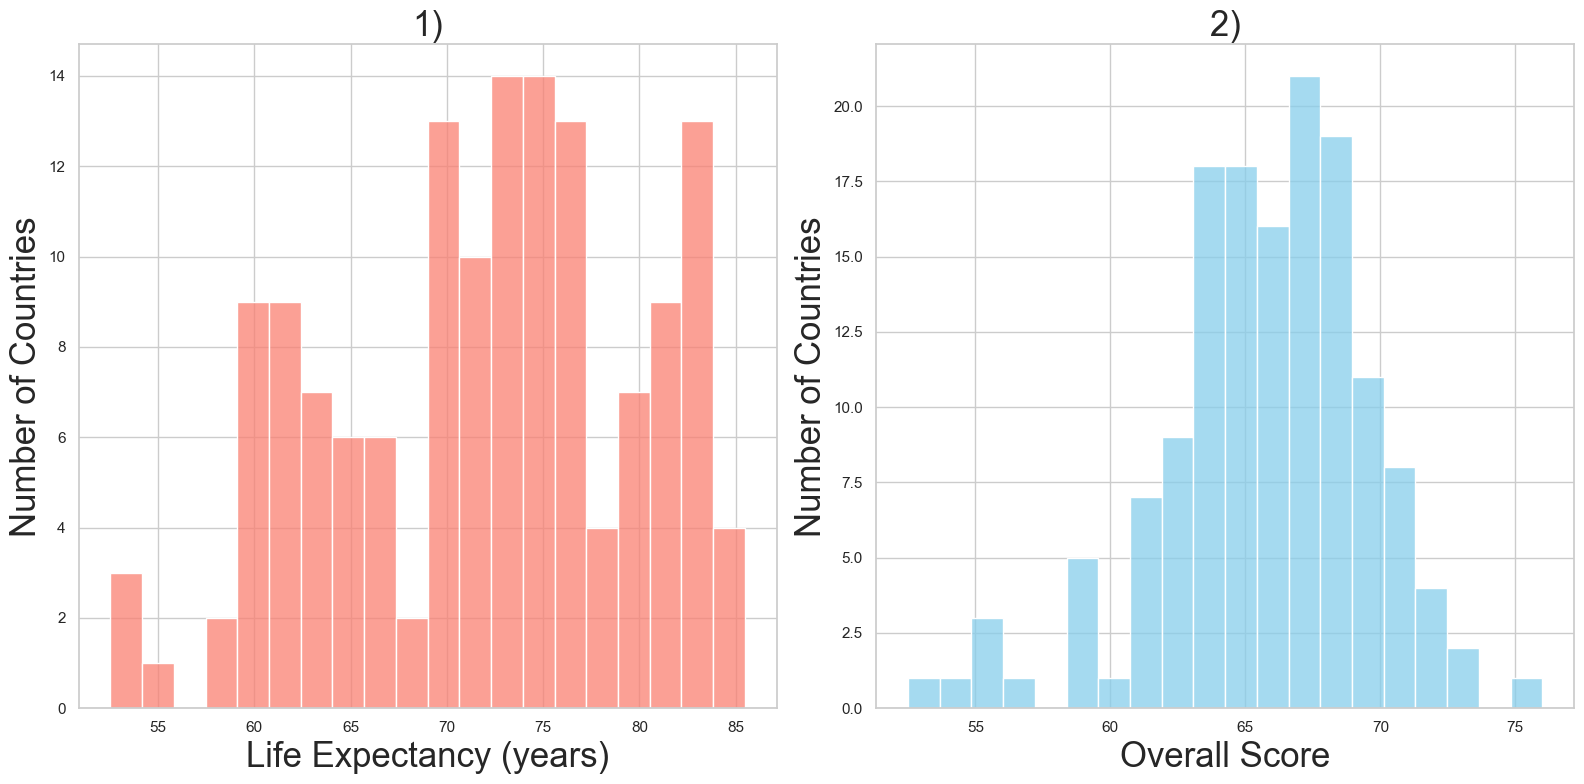

In [53]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

sns.histplot(
    data=merged_df,  
    x="Life Expectancy",  
    bins=20,
    color="salmon",
    ax=axes[0]
)
axes[0].set_xlabel("Life Expectancy (years)", fontsize=25)
axes[0].set_ylabel("Number of Countries", fontsize=25)
axes[0].set_title("1)", fontsize=25)

sns.histplot(
    data=merged_df,  
    x="Overall",  
    bins=20,
    color="skyblue",
    ax=axes[1]
)
axes[1].set_xlabel("Overall Score", fontsize=25)
axes[1].set_ylabel("Number of Countries", fontsize=25)
axes[1].set_title("2)", fontsize=25)

plt.tight_layout()

plt.show()

## 5. Data Manipulation


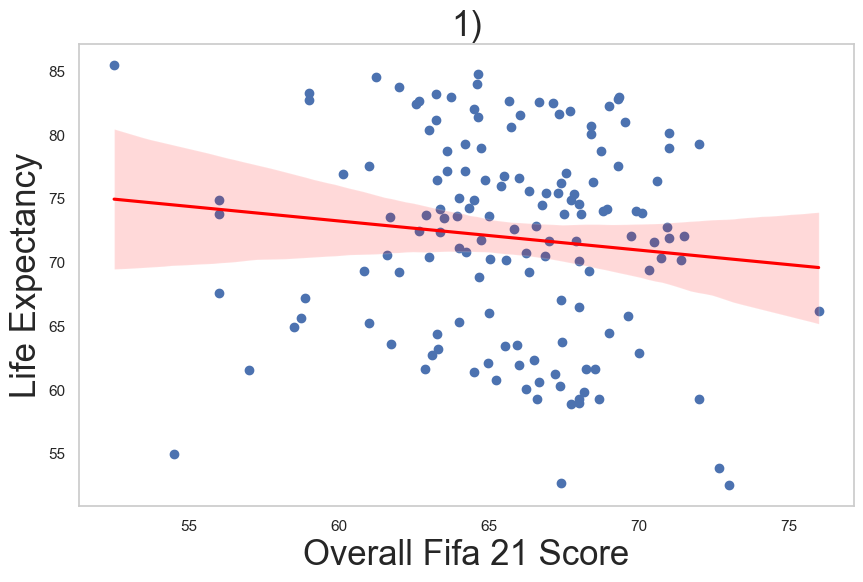

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.813
Date:                Sat, 16 Nov 2024   Prob (F-statistic):              0.180
Time:                        16:46:34   Log-Likelihood:                -507.30
No. Observations:                 146   AIC:                             1019.
Df Residuals:                     144   BIC:                             1025.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     86.9535     11.159      7.792      0.0

In [54]:
merged_data = merged_df.rename(columns={
    "Overall": "Overall",
    "Life Expectancy":"Life_Expectancy"
    }) 

plt.show()
plt.figure(figsize=(10, 6))
sns.regplot(x = merged_data['Overall'], y = merged_data['Life_Expectancy'], 
            scatter_kws = {"alpha": 1},
            line_kws={'color': 'red'})

plt.title('1)',fontsize=25)
plt.xlabel('Overall Fifa 21 Score',fontsize=25)
plt.ylabel('Life Expectancy',fontsize=25)
plt.grid()
plt.show()

results = smf.ols(formula = 'Life_Expectancy ~ Overall', data = merged_data).fit()

print(results.summary())